In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

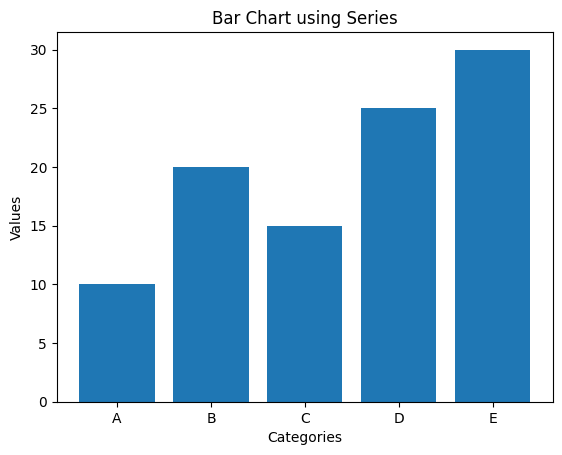

In [3]:
# Creating a sample Series
data = pd.Series([10, 20, 15, 25, 30], index=['A', 'B', 'C', 'D', 'E'])

# Creating a bar chart using pyplot
plt.bar(data.index, data.values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart using Series')
plt.show()

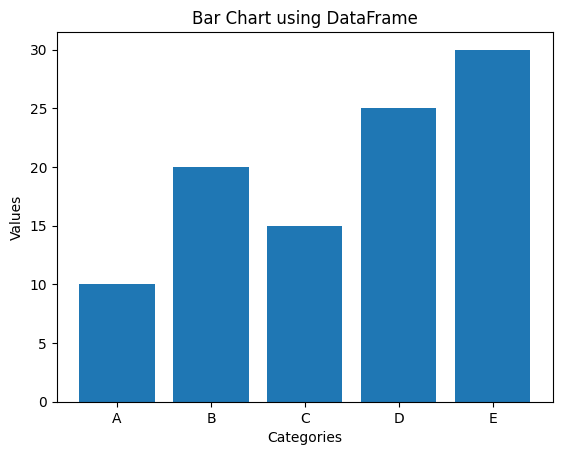

In [4]:
# Creating a sample DataFrame
data = {'Categories': ['A', 'B', 'C', 'D', 'E'],
        'Values': [10, 20, 15, 25, 30]}
df = pd.DataFrame(data)

# Creating a bar chart using pyplot
plt.bar(df['Categories'], df['Values'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart using DataFrame')
plt.show()

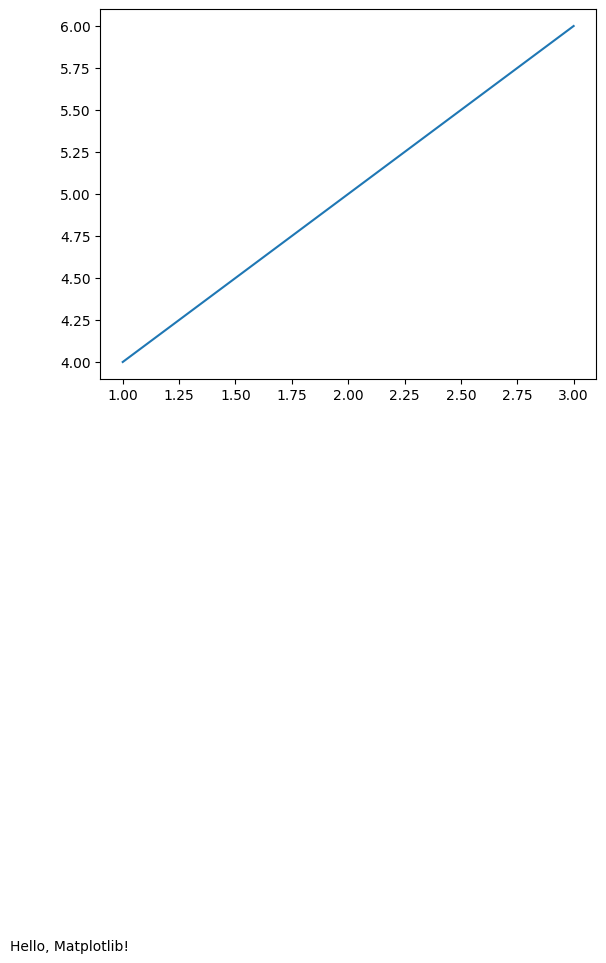

In [5]:
# Creating a Figure and an Axes object
fig = plt.figure()
ax = fig.add_subplot(111)

# Creating a Line2D Artist object (line)
line = ax.plot([1, 2, 3], [4, 5, 6])

# Creating a Text Artist object (text)
text = ax.text(0.5, 0.5, 'Hello, Matplotlib!')

# Displaying the plot
plt.show()

SyntaxError: invalid syntax (12218398.py, line 1)